#  project saftey Management for Enginerrs  

Oz Nissenboim 318750429

Bnaya Unger 318201571 

## part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
project = pkl.load(open('df_task_1_group_18.pkl', 'rb'))
project['intercept'] = np.ones(project.shape[0])



# Q1

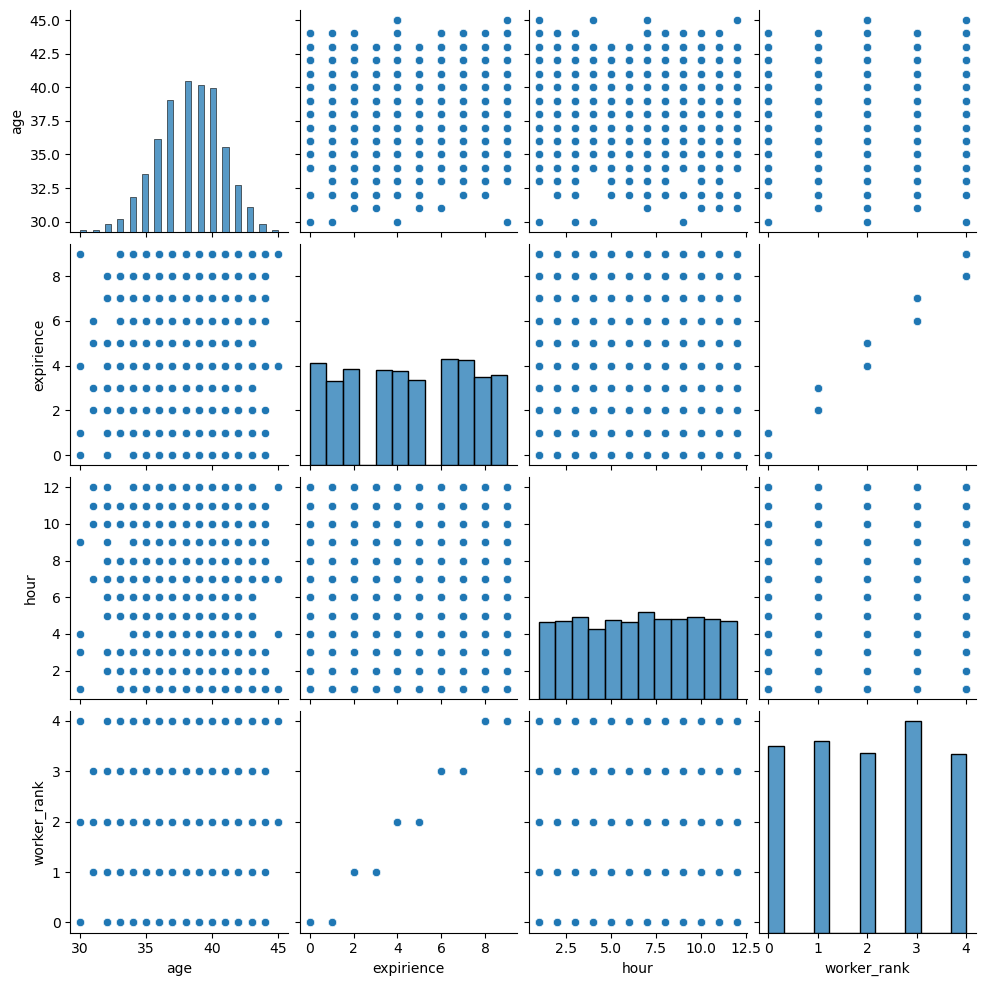

In [3]:
selected_columns = ['age','expirience', 'hour','worker_rank' ]
selected_data = project[selected_columns]
sns.pairplot(selected_data)
plt.show()



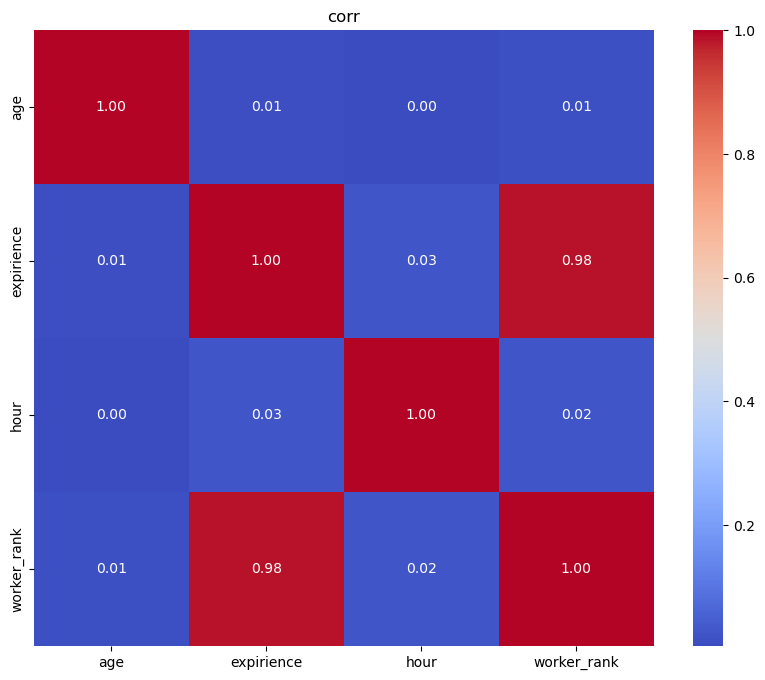

In [4]:
selected_columns = ['age','expirience', 'hour','worker_rank' ]
selected_data = project[selected_columns]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('corr')
plt.show()


<div dir="rtl">
    ניתן לראות כי יש קשר חיובי חזק בין הexpirience לworker_rank

# Q2

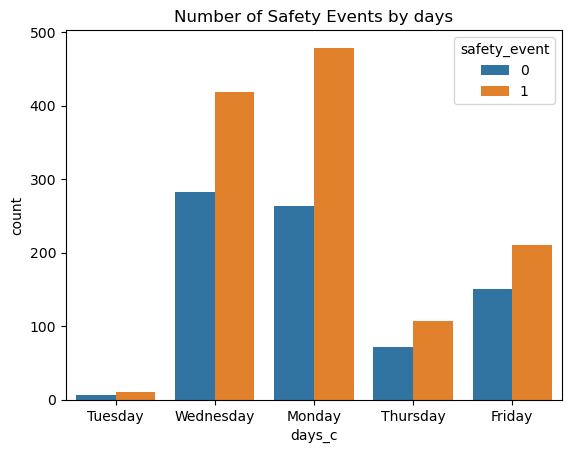

In [5]:
sns.countplot(x="days_c",hue='safety_event' ,data=project)
plt.title("Number of Safety Events by days")
plt.show()


<div dir="rtl">
ביום שני ניתן לראות שיש הכי הרבה סיכוי לתאונה לעומת שלא תהיה תאונה. בנוסף רואים שוני גדול בין הימים, לכן אפשר להניח שתהיה מובהקות גבוהה וניתן יהיה לקחת אותו כמשתנה מסביר במודל הרגרסיה 



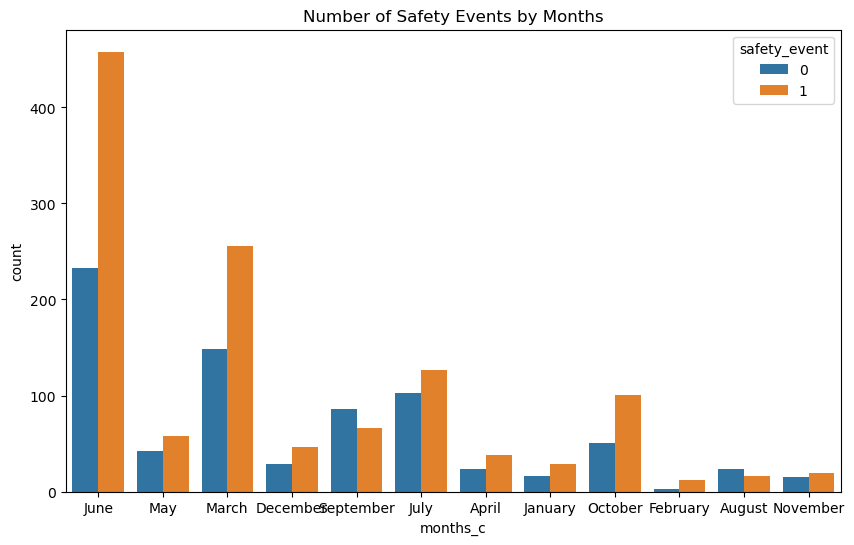

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x="months_c", hue='safety_event', data=project)
plt.title("Number of Safety Events by Months")
plt.show()


<div dir="rtl">
בחודש יוני ניתן לראות שיש הכי הרבה סיכוי לתאונה לעומת שלא תהיה תאונה. בנוסף רואים שוני גדול בין הימים, לכן אפשר להניח שתהיה מובהקות גבוהה וניתן יהיה לקחת אותו כמשתנה מסביר במודל הרגרסיה 



# Q3

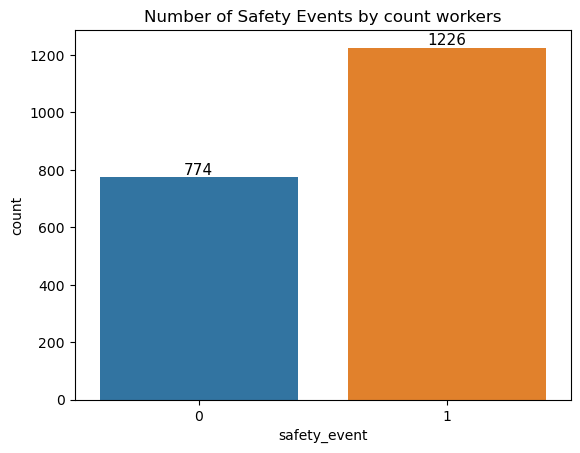

In [7]:
sns.countplot(x='safety_event' ,data=project)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.title("Number of Safety Events by count workers")

plt.show()

In [8]:
774 + 1226

2000

In [9]:
774 / 2000

0.387

In [10]:
1226 / 2000

0.613

<div dir="rtl">
באופן יחסי, ניתן לראות שהנתונים מאוזנים. כ60% היו אירועים בטיחות ו38% שלא היו אירועי בטיחות

# Q4

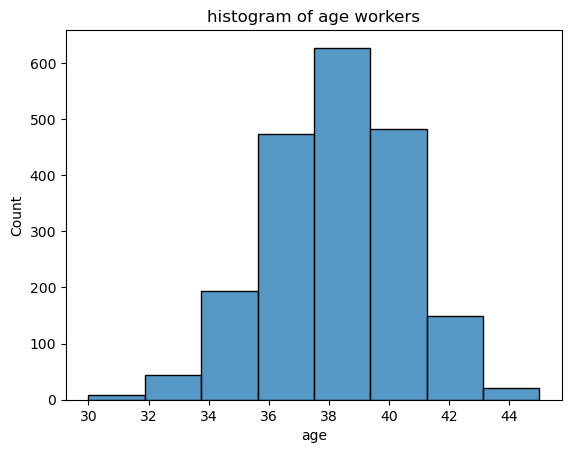

In [11]:
sns.histplot(project, x = 'age', bins = 8)
plt.title("histogram of age workers")

plt.show()

<div dir="rtl">
ניתן לראות כאן את פילוג גילאי העובדים. כמו שניתן להבין, רוב העובדים הם בגיל 38.

# Q5

In [12]:
dumi = pd.get_dummies(project)
y = project['safety_event']
x_data = dumi.drop(['safety_event','days_c_Friday','toys_c_dolls','factories_rand_c_Anqing','months_c_April'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=1)

# Q6

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result1=logit_model.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.415474
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                           28
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.3772
Time:                        19:29:55   Log-Likelihood:                -581.66
converged:                       True   LL-Null:                       -933.97
Covariance Type:            nonrobust   LLR p-value:                2.117e-130
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                           -0.0233      0.031     -0.755      0.450      -0.084       0.037
expirience                    -0.4483      0.150     -2.995      0.003      -0.742      -0.155
hour                          -0.2151      0.023     -9.236      0.000      -0.261      -0.169
worker_rank                   -0.3900      0.303     -1.287      0.198      -0.984       0.204
intercept                      6.6584      1.395      4.772      0.000       3.924       9.393
days_c_Monday                  0.5057      0.213      2.370      0.018       0.088       0.924
days_c_Thursday                0.0453      0.298      0.152      0.879      -0.538       0.629
days_c_Tuesday                 0.3015      1.064      0.283      0.777      -1.784       2.387
days_c_Wednesday               0.0060      0.211      0.029      0.977      -0.407       0.419
toys_c_electric_toys          -1.1501      0.440     -2.611      0.009      -2.013      -0.287
toys_c_puzzels                -0.9517      0.463     -2.054      0.040      -1.860      -0.044
toys_c_spinner                -0.7400      0.394     -1.878      0.060      -1.512       0.032
toys_c_toy_cars               -0.5903      0.427     -1.381      0.167      -1.428       0.248
factories_rand_c_Bengbu        0.5430      0.298      1.821      0.069      -0.041       1.127
factories_rand_c_Hefei        -0.3885      0.261     -1.491      0.136      -0.899       0.122
factories_rand_c_Huainan       1.0903      0.935      1.166      0.243      -0.742       2.922
factories_rand_c_Huangshan    -0.1310      0.435     -0.301      0.763      -0.984       0.722
factories_rand_c_Ma’anshan    -0.0846      0.283     -0.299      0.765      -0.639       0.470
months_c_August               -1.6695      0.796     -2.098      0.036      -3.229      -0.110
months_c_December              0.0097      0.618      0.016      0.988      -1.202       1.221
months_c_February              1.1147      0.891      1.252      0.211      -0.631       2.860
months_c_January               0.5398      0.762      0.709      0.479      -0.953       2.033
months_c_July                 -0.5421      0.541     -1.002      0.317      -1.603       0.519
months_c_June                  0.1961      0.510      0.384      0.701      -0.804       1.196
months_c_March                 0.0651      0.520      0.125      0.900      -0.954       1.084
months_c_May                  -0.0332      0.593     -0.056      0.955      -1.195       1.128
months_c_November             -0.3759      0.731     -0.514      0.607      -1.809       1.057
months_c_October               0.3910      0.565      0.692      0.489      -0.717       1.499
months_c_September            -1.1108      0.566     -1.962      0.050      -2.221      -0.001
==============================================================================================
"""

In [14]:
result1.aic, result1.bic

(1221.325976148211, 1373.4085741007082)

In [15]:
df_p_1 = pd.DataFrame(result1.pvalues, columns = [ 'pval'])
df_p_1['vars'] = df_p_1.index
df_p_1 = df_p_1.reset_index()
df_p_1.head()
var_cols = []
for var in df_p_1['vars']:
    if df_p_1.loc[df_p_1['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
        
        
print(var_cols)

['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'toys_c_puzzels', 'months_c_August', 'months_c_September']


In [16]:
x1 = x_data[['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'toys_c_puzzels', 'months_c_August', 'months_c_September']]
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=1)
logit_model=sm.Logit(y_train,x_train)
result1=logit_model.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.430497
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1392
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.3547
Time:                        19:29:59   Log-Likelihood:                -602.70
converged:                       True   LL-Null:                       -933.97
Covariance Type:            nonrobust   LLR p-value:                8.130e-139
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
expirience              -0.6131      0.033    -18.314      0.000      -0.679      -0.547
hour                    -0.2101      0.023     -9.321      0.000      -0.254      -0.166
intercept                4.9760      0.287     17.325      0.000       4.413       5.539
days_c_Monday            0.4817      0.153      3.151      0.002       0.182       0.781
toys_c_electric_toys    -0.4818      0.226     -2.133      0.033      -0.925      -0.039
toys_c_puzzels          -0.2067      0.259     -0.799      0.424      -0.713       0.300
months_c_August         -1.5933      0.604     -2.637      0.008      -2.777      -0.409
months_c_September      -1.2066      0.278     -4.336      0.000      -1.752      -0.661
========================================================================================
"""

In [17]:
result1.aic, result1.bic 

(1221.3909178126896, 1263.3447379375164)

In [18]:
df_p_1 = pd.DataFrame(result1.pvalues, columns = [ 'pval'])
df_p_1['vars'] = df_p_1.index
df_p_1 = df_p_1.reset_index()
df_p_1.head()
var_cols = []
for var in df_p_1['vars']:
    if df_p_1.loc[df_p_1['vars']==var, 'pval'].item() < 0.05:
        var_cols.append(var)
        
        
print(var_cols)

['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']


In [19]:
x1 = x_data[['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']]

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=1)
logit_model=sm.Logit(y_train,x_train)
result1=logit_model.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.430724
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1393
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.3544
Time:                        19:30:00   Log-Likelihood:                -603.01
converged:                       True   LL-Null:                       -933.97
Covariance Type:            nonrobust   LLR p-value:                1.017e-139
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
expirience              -0.6128      0.033    -18.325      0.000      -0.678      -0.547
hour                    -0.2096      0.023     -9.309      0.000      -0.254      -0.165
intercept                4.9512      0.285     17.377      0.000       4.393       5.510
days_c_Monday            0.4819      0.153      3.154      0.002       0.182       0.781
toys_c_electric_toys    -0.4620      0.224     -2.058      0.040      -0.902      -0.022
months_c_August         -1.6079      0.601     -2.674      0.007      -2.786      -0.429
months_c_September      -1.2023      0.278     -4.318      0.000      -1.748      -0.657
========================================================================================
"""

In [20]:
result1.aic, result1.bic

(1220.0275952709019, 1256.7371878801252)

<div dir="rtl">
שני המדדים נותנים עדיפות למודלים יותר פשוטים ועם פחות משתנים מסבירים,
מכיוון שהורדנו את הערכים עם הפי וליו הגבוה, וכתוצאה מכך נשארנו עם פחות משתנים מסבירים, שתי המדדים יצאו יותר נמוכים.

# Q7

In [21]:
x_train['expirience'].mean(),  x_train['hour'].mean()

(4.514285714285714, 6.6085714285714285)

In [22]:
result1.predict(np.array([4.514285714285714, 6.6085714285714285,1.0,0,0,0,0]))

array([0.68991224])

<div dir="rtl">
תוצאת החיזוי עבור ערכי הממוצע של המשתנים הרציפים ועבור ערך 0 לכל המשתנים הקטגוריאלים הוא 0.68991224 

# Q8

In [23]:
expirience = 4.5142
hours = np.repeat(np.arange(-50, 50), 1)
intercept = np.ones(hours.shape[0])
days_c_Monday = np.zeros(hours.shape[0])
toys_c_electric_toys = np.zeros(hours.shape[0])
months_c_August = np.zeros(hours.shape[0])
months_c_September = np.zeros(hours.shape[0])

dataNoSep = pd.DataFrame({
    'expirience': expirience,
    'hour': hours,
    'intercept': intercept,
    'days_c_Monday': days_c_Monday,
    'toys_c_electric_toys': toys_c_electric_toys,
    'months_c_August': months_c_August,
    'months_c_September': months_c_September
})

dataNoSep['predicted_probability'] = result1.predict(dataNoSep[['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']])

dataNoSep


,expirience,hour,intercept,days_c_Monday,toys_c_electric_toys,months_c_August,months_c_September,predicted_probability
0,4.5142,-50,1.0,0.0,0.0,0.0,0.0,0.999997
1,4.5142,-49,1.0,0.0,0.0,0.0,0.0,0.999996
2,4.5142,-48,1.0,0.0,0.0,0.0,0.0,0.999995
3,4.5142,-47,1.0,0.0,0.0,0.0,0.0,0.999994
4,4.5142,-46,1.0,0.0,0.0,0.0,0.0,0.999993
...,...,...,...,...,...,...,...,...
95,4.5142,45,1.0,0.0,0.0,0.0,0.0,0.000712
96,4.5142,46,1.0,0.0,0.0,0.0,0.0,0.000578
97,4.5142,47,1.0,0.0,0.0,0.0,0.0,0.000469
98,4.5142,48,1.0,0.0,0.0,0.0,0.0,0.000380


In [24]:
expirience = 4.5142
hours = np.repeat(np.arange(-50, 50), 1)
intercept = np.ones(hours.shape[0])
days_c_Monday = np.zeros(hours.shape[0])
toys_c_electric_toys = np.zeros(hours.shape[0])
months_c_August = np.zeros(hours.shape[0])
months_c_September = np.ones(hours.shape[0])

dataSep = pd.DataFrame({
    'expirience': expirience,
    'hour': hours,
    'intercept': intercept,
    'days_c_Monday': days_c_Monday,
    'toys_c_electric_toys': toys_c_electric_toys,
    'months_c_August': months_c_August,
    'months_c_September': months_c_September
})

dataSep['predicted_probability'] = result1.predict(dataSep[['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']])

dataSep


,expirience,hour,intercept,days_c_Monday,toys_c_electric_toys,months_c_August,months_c_September,predicted_probability
0,4.5142,-50,1.0,0.0,0.0,0.0,1.0,0.999989
1,4.5142,-49,1.0,0.0,0.0,0.0,1.0,0.999987
2,4.5142,-48,1.0,0.0,0.0,0.0,1.0,0.999984
3,4.5142,-47,1.0,0.0,0.0,0.0,1.0,0.999980
4,4.5142,-46,1.0,0.0,0.0,0.0,1.0,0.999976
...,...,...,...,...,...,...,...,...
95,4.5142,45,1.0,0.0,0.0,0.0,1.0,0.000214
96,4.5142,46,1.0,0.0,0.0,0.0,1.0,0.000174
97,4.5142,47,1.0,0.0,0.0,0.0,1.0,0.000141
98,4.5142,48,1.0,0.0,0.0,0.0,1.0,0.000114


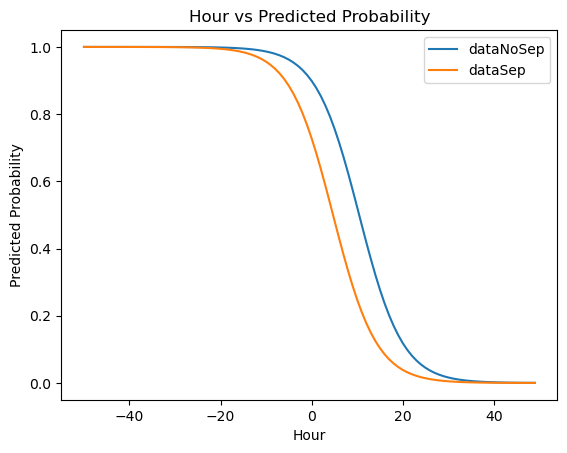

In [25]:
sns.lineplot(x='hour', y='predicted_probability', data=dataNoSep, label='dataNoSep')
sns.lineplot(x='hour', y='predicted_probability', data=dataSep, label='dataSep')

plt.xlabel('Hour')
plt.ylabel('Predicted Probability')
plt.title('Hour vs Predicted Probability')

plt.legend()

plt.show()


<div dir="rtl">
רואים שבחודשים שהם לא ספטמבר ההסתברות לתאונה גבוהה יותר 

# Q9

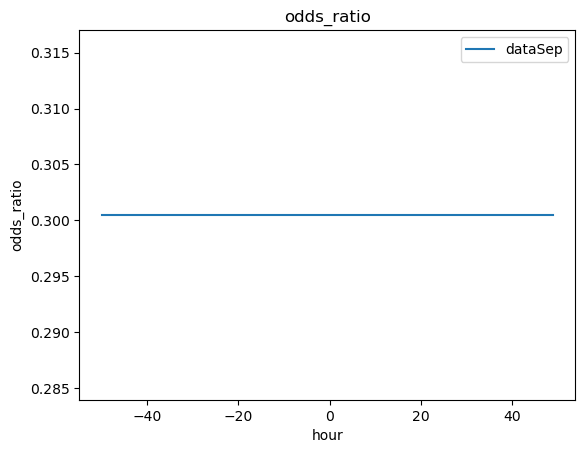

In [26]:
dataSep['oods'] = dataSep['predicted_probability']  / (1- dataSep['predicted_probability'])
dataNoSep['oods'] = dataNoSep['predicted_probability']  / (1- dataNoSep['predicted_probability'])
dataSep['odds_ratio'] = dataSep['oods']  / dataNoSep['oods']
dataSep['odds_ratio'] = dataSep['odds_ratio'].round(6)
sns.lineplot(x='hour', y='odds_ratio', data=dataSep, label='dataSep')
plt.title('odds_ratio')
plt.show()

<div dir="rtl">
הoods ration שווה בכל הערכים שלו.
כלומר, לא משנה באיזה שעה מדובר, תמיד היחס של תאונה בספטמטבר לעומת חודשים אחרים יהיה שווה 

In [27]:
import numpy as np

x = 0.300488
log_x = np.log(x)
log_x

-1.2023474592484957

<div dir="rtl">
כעת קיבלנו את הlog odd ration, שהוא שווה למקדם הcoef של months_c_September
כלומר הcoef במודל, מציג לנו את הסיכוי בלוג שתקרה תאונה בספטמבר לעומת חודשים אחרים

# Q10

In [28]:
x_test['safety_event'] = y_test
x_test['predicted_probability'] = result1.predict(x_test[['expirience', 'hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']])
x_test['classification'] = x_test['predicted_probability'].apply(lambda x: 1 if x >0.5  else 0)

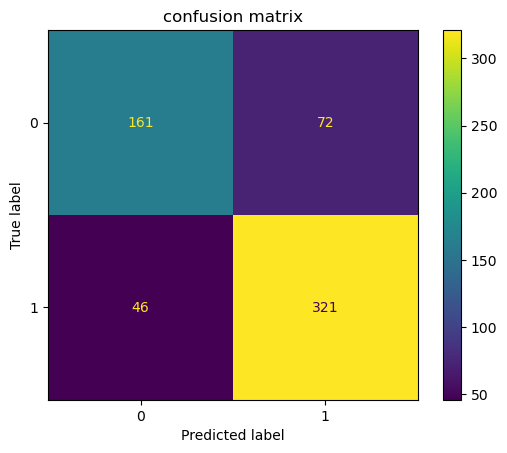

In [29]:
cm = confusion_matrix(x_test['safety_event'], x_test['classification'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array([0,1]))
disp.plot()
plt.title('confusion matrix')
plt.show()

In [30]:
print('sensetivy' , cm[0,0]/(cm[0,0]+cm[0,1]))

sensetivy 0.6909871244635193


In [31]:
thresh = np.linspace(0,1,1000)

for i in thresh:
    x_test['classification'] = x_test['predicted_probability'].apply(lambda x: 1 if x >i  else 0)
    cm = confusion_matrix(x_test['safety_event'], x_test['classification'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array([0,1]))
    y_thresh = cm[0,0]/(cm[0,0]+cm[0,1])
    if y_thresh >= 0.8:
        print ('ערך הסף המקסימלי:',i)
        break

ערך הסף המקסימלי: 0.6186186186186187


# Q11

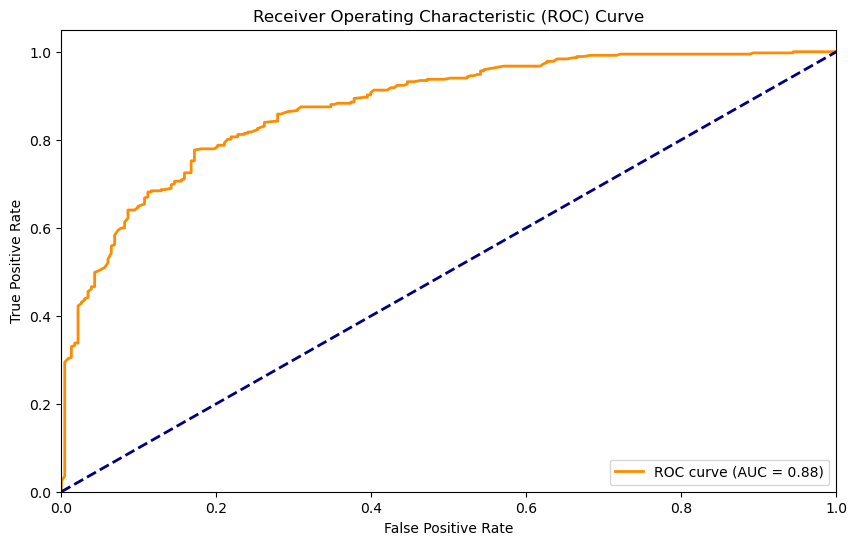

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, x_test['predicted_probability'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')




plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Q12

Optimization terminated successfully.
         Current function value: 0.632331
         Iterations 5


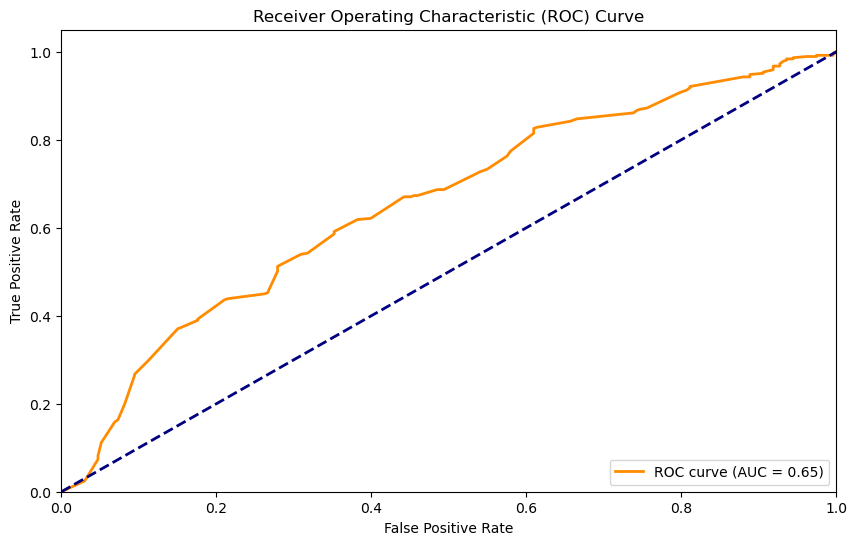

In [33]:
x2 = x_data[['hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.3, random_state=1)
logit_model1=sm.Logit(y2_train,x2_train)
result1=logit_model1.fit()
x2_test['safety_event'] = y2_test
x2_test['predicted_probability'] = result1.predict(x2_test[['hour', 'intercept', 'days_c_Monday', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']])
x2_test['classification'] = x2_test['predicted_probability'].apply(lambda x: 1 if x >0.5  else 0)

fpr2, tpr2, thresholds2 = roc_curve(y2_test, x2_test['predicted_probability'])
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(10, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimization terminated successfully.
         Current function value: 0.434338
         Iterations 7


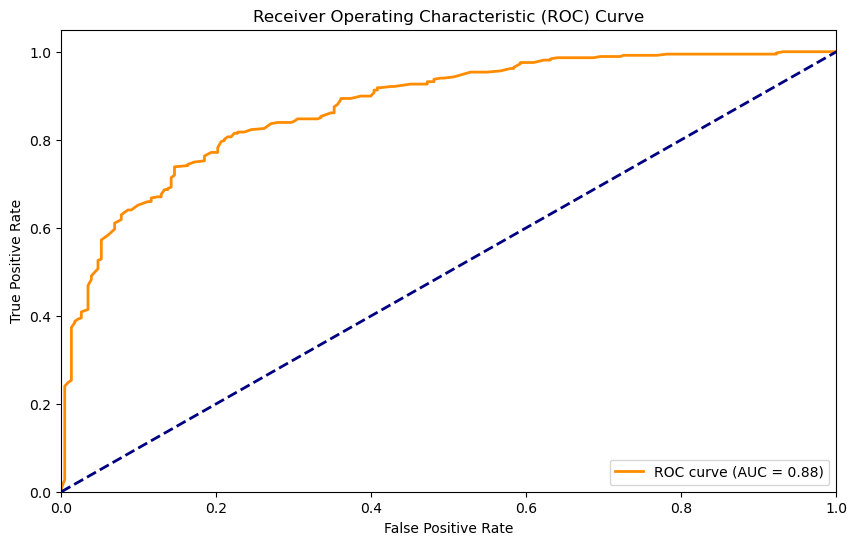

In [34]:
x2 = x_data[['expirience','hour', 'intercept', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']]
x3_train, x3_test, y3_train, y3_test = train_test_split(x2, y, test_size=0.3, random_state=1)
logit_model1=sm.Logit(y3_train,x3_train)
result1=logit_model1.fit()
result1.summary()


x3_test['safety_event'] = y3_test
x3_test['predicted_probability'] = result1.predict(x3_test[['expirience','hour', 'intercept', 'toys_c_electric_toys', 'months_c_August', 'months_c_September']])
x3_test['classification'] = x3_test['predicted_probability'].apply(lambda x: 1 if x >0.6186186186186187  else 0)

fpr3, tpr3, thresholds3 = roc_curve(y3_test, x3_test['predicted_probability'])
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(10, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

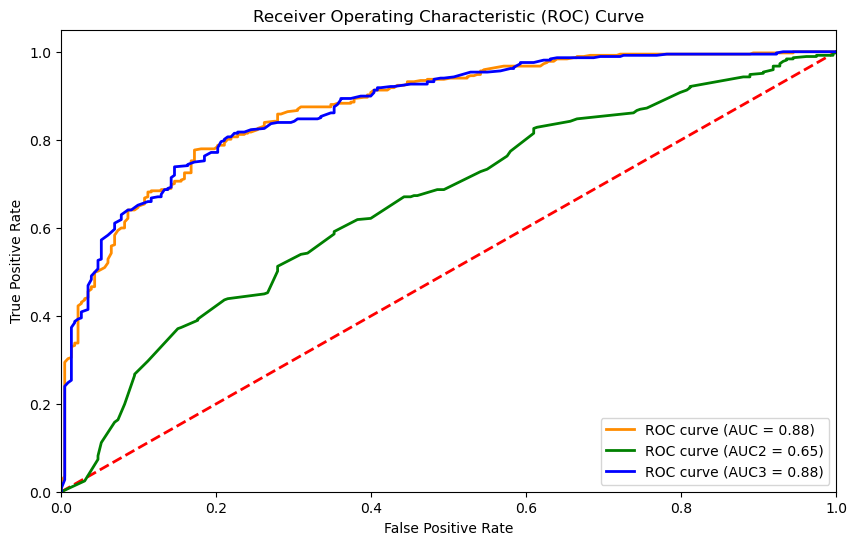

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot(fpr2, tpr2, color='green', lw=2, label='ROC curve (AUC2 = {:.2f})'.format(roc_auc2))
plt.plot(fpr3, tpr3, color='blue', lw=2, label='ROC curve (AUC3 = {:.2f})'.format(roc_auc3))



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<div dir="rtl">

##    חלק 2

In [36]:
project_Q2 = pkl.load(open('drunk_driver_grpoup_18.pkl', 'rb'))
project_Q2[0:2]

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver
0,5.18407,1.0,33,17,3,male,evening,29
1,17.25972,1.0,28,17,3,male,night,84


# Q1

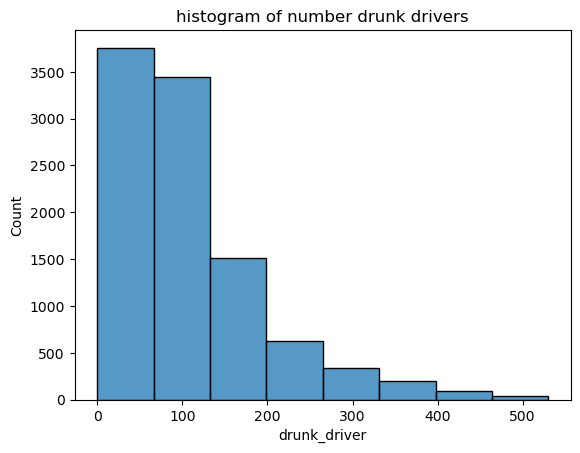

In [37]:
sns.histplot(project_Q2, x = 'drunk_driver', bins = 8)
plt.title('histogram of number drunk drivers')
plt.show()

<div dir="rtl">
ניתן לראות שיש כבישים שיש בהם הרבה שיכורים, אך ברוב הכבישים הכמות קטנה. ככל שעולה כמות השיכורים על כביש אחת, השכיחיות של הכמות הזאת יורדת.


# Q2

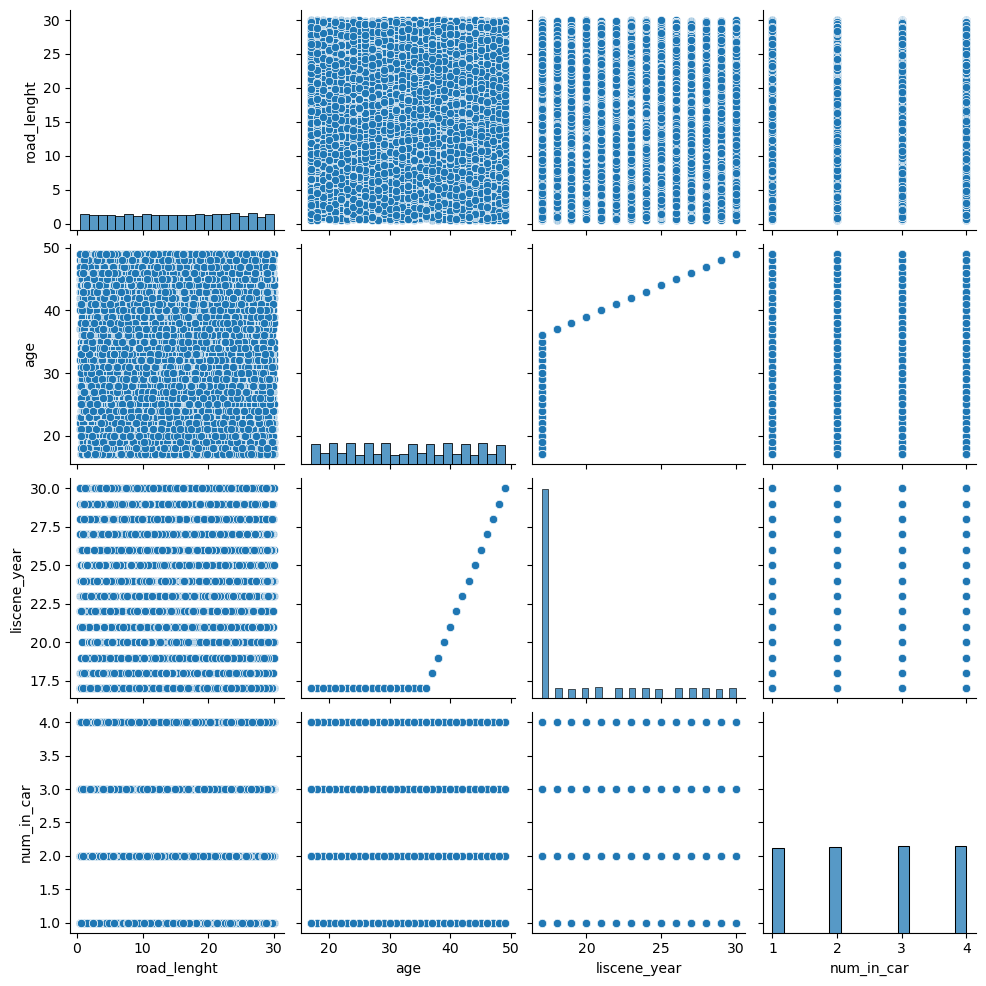

In [38]:
selected_columns = ['road_lenght','age', 'liscene_year','num_in_car' ]
selected_data = project_Q2[selected_columns]
sns.pairplot(selected_data)
plt.show()



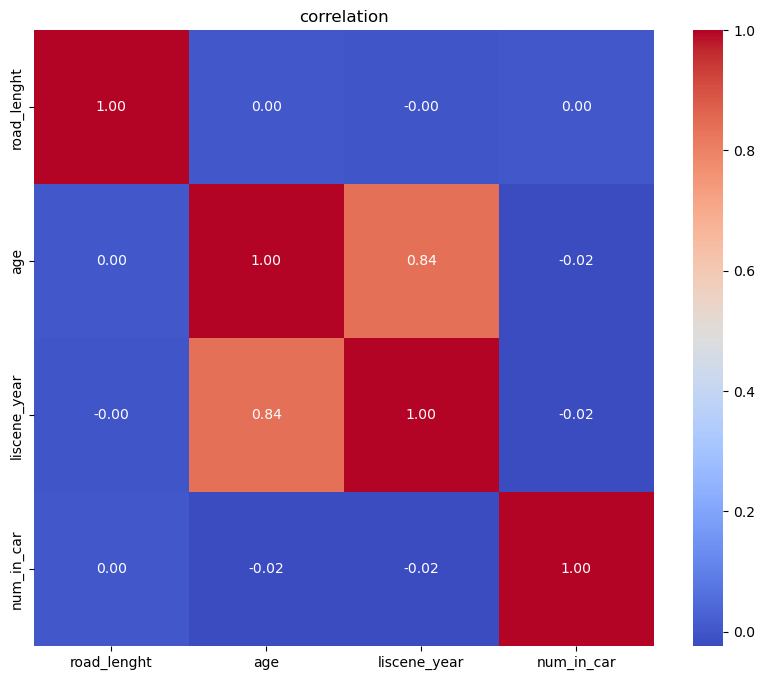

In [39]:
selected_columns = ['road_lenght','age', 'liscene_year','num_in_car' ]
selected_data = project_Q2[selected_columns]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()


<div dir="rtl">
רואים שיש קורולוציה בין מספר שנות הרישיון לבין הגיל. ככל שהגיל עולה, גם מספר השנות רישיון עולה

# Q3

In [40]:
project_Q2['drunk_per_km'] = project_Q2['drunk_driver'] / project_Q2['road_lenght']

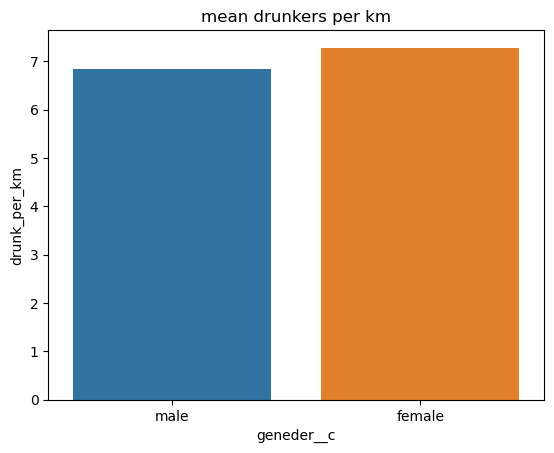

In [41]:
sns.barplot(x=project_Q2['geneder__c'], y=project_Q2['drunk_per_km'], palette=["#1f77b4", "#ff7f0e"],ci=None)
plt.title('mean drunkers per km')
plt.show()

<div dir="rtl">
ניתן לראות שבממוצע לק"מ יש יותר נשים שיכורות

# Q4

In [42]:
dumi_q2 = pd.get_dummies(project_Q2)

In [43]:
model = sm.OLS(dumi_q2['drunk_driver'], dumi_q2[['road_lenght', 'intercept','age','liscene_year','num_in_car','geneder__c_male','day_time_rand__c_afternoon','day_time_rand__c_morning','day_time_rand__c_night']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     6298.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:30:32   Log-Likelihood:                -49903.
No. Observations:               10000   AIC:                         9.982e+04
Df Residuals:                    9991   BIC:                         9.989e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
road_lenght         

In [44]:
model2 = sm.OLS(dumi_q2['drunk_driver'], dumi_q2[['road_lenght', 'intercept','age','liscene_year','geneder__c_male','day_time_rand__c_afternoon','day_time_rand__c_morning','day_time_rand__c_night']])
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     6298.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:30:33   Log-Likelihood:                -49903.
No. Observations:               10000   AIC:                         9.982e+04
Df Residuals:                    9991   BIC:                         9.989e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
road_lenght         

# Q5

<div dir="rtl">
1. מניחים לינאריות

<div dir="rtl">
2. שונות קבועה בשגיאה

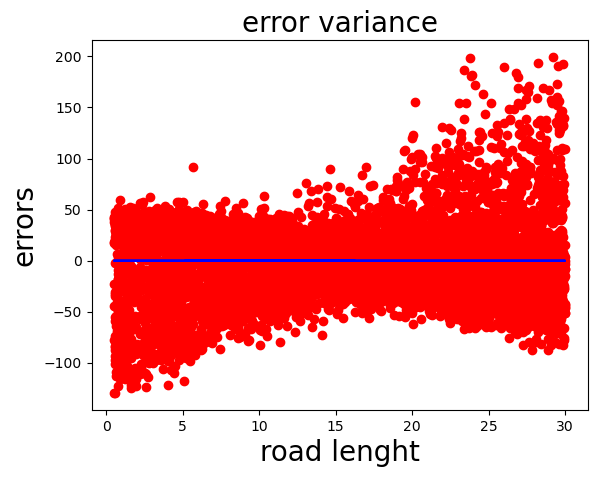

In [47]:
import matplotlib.pyplot as plt

residuals = dumi_q2['drunk_driver'] - results.predict(dumi_q2[['road_lenght', 'intercept', 'age', 'liscene_year','num_in_car', 'geneder__c_male', 'day_time_rand__c_afternoon', 'day_time_rand__c_morning', 'day_time_rand__c_night']])

plt.figure()
plt.scatter(dumi_q2['road_lenght'], residuals, color='r')

plt.plot(dumi_q2['road_lenght'], np.zeros(len(dumi_q2['road_lenght'])), color='blue')

plt.xlabel('road lenght', fontsize=20)
plt.ylabel('errors', fontsize=20)
plt.title('error variance', fontsize=20)

plt.show()


<div dir="rtl">
ניתן לראות שהשונות של השגיאות לא קבועה לכן ההנחה לא מתקיימת

<div dir="rtl">
3. התפלגות נורמלית

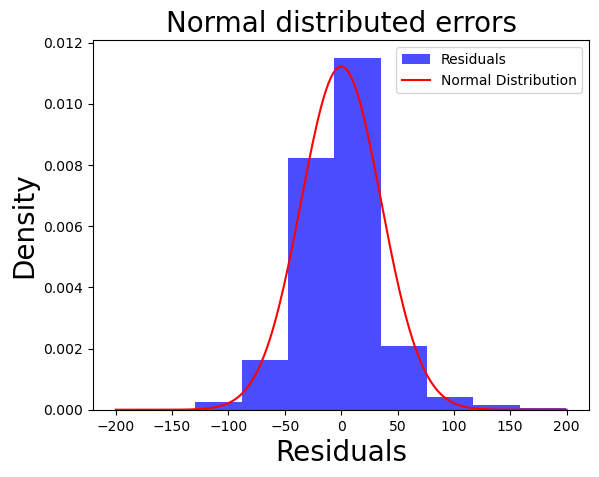

In [49]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

residuals = dumi_q2['drunk_driver'] - results.predict(dumi_q2[['road_lenght', 'intercept', 'age', 'liscene_year','num_in_car', 'geneder__c_male', 'day_time_rand__c_afternoon', 'day_time_rand__c_morning', 'day_time_rand__c_night']])
mean_val = np.mean(residuals)
std_val = np.std(residuals)

plt.figure()
plt.hist(residuals, bins=8, density=True, color='blue', alpha=0.7, label='Residuals')

x = np.linspace(-200, 200, 200)
plt.plot(x, scipy.stats.norm(mean_val, std_val).pdf(x), color='red', label='Normal Distribution')

plt.xlabel('Residuals', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('Normal distributed errors', fontsize=20)
plt.legend()

plt.show()


<div dir="rtl">
ניתן לראות שהשגיאות מתפלגות נורמלי

<div dir="rtl">
    
## ההנחה של שונות קבועה בשגיאות הופרה! 

# Q6

In [51]:
offset=np.log(dumi_q2['road_lenght'].values)
x_pois=dumi_q2.drop(columns=['drunk_driver'])
y_pois=dumi_q2['drunk_driver']

In [52]:
model_poisson1 = sm.GLM(y_pois,x_pois.drop(columns=['road_lenght','geneder__c_female','day_time_rand__c_afternoon']) ,offset=offset , family=sm.families.Poisson()) 
results_poisson1 = model_poisson1.fit()
print(results_poisson1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35661.
Date:                Mon, 11 Nov 2024   Deviance:                       10096.
Time:                        19:37:31   Pearson chi2:                 9.60e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [53]:
model_poisson2 = sm.GLM(y_pois,x_pois.drop(columns=['road_lenght','num_in_car','geneder__c_female','day_time_rand__c_afternoon','day_time_rand__c_night']) ,offset=offset , family=sm.families.Poisson()) 
results_poisson2 = model_poisson2.fit()
print(results_poisson2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35664.
Date:                Mon, 11 Nov 2024   Deviance:                       10101.
Time:                        19:38:14   Pearson chi2:                 9.60e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

# Q7

In [54]:
x_2=dumi_q2[[ 'intercept','age','liscene_year','num_in_car','geneder__c_male','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']]
y_2=  dumi_q2['drunk_driver']

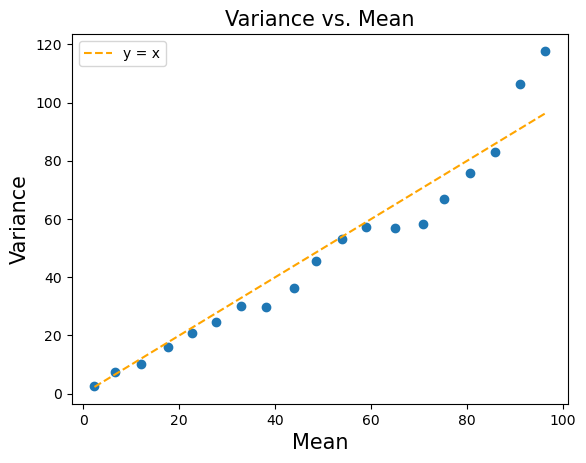

In [55]:
dumi_q2['predict']=results_poisson2.fittedvalues
lams = np.linspace(0, 100, 20)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = dumi_q2.loc[(dumi_q2['predict']>lb)& (dumi_q2['predict']<ub), 'drunk_driver'].shape
    var = dumi_q2.loc[(dumi_q2['predict']>lb)& (dumi_q2['predict']<ub), 'drunk_driver'].std()**2
    mean = dumi_q2.loc[(dumi_q2['predict']>lb)& (dumi_q2['predict']<ub), 'drunk_driver'].mean()
    
    if shape[0] > 15:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color='orange')
plt.xlabel('Mean', fontsize=15)
plt.ylabel('Variance', fontsize=15)
plt.title('Variance vs. Mean', fontsize=15)
plt.legend()
plt.show()


<div dir="rtl">
ניתן לראות שהשונות שווה לתוחלת


2

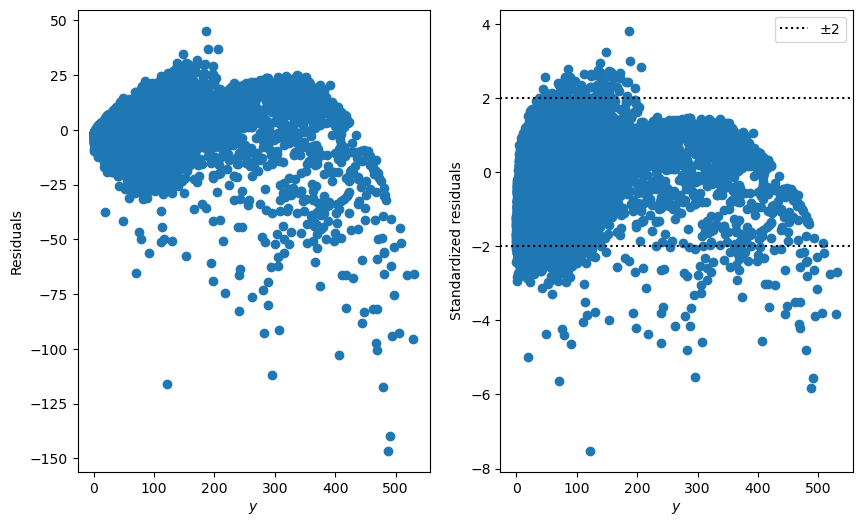

In [56]:
f, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].scatter(dumi_q2['drunk_driver'], results_poisson2.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(dumi_q2['drunk_driver'], results_poisson2.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [57]:
points_between = np.sum((results_poisson2.resid_pearson >= -2) & (results_poisson2.resid_pearson <= 2))
percentage_between = (points_between / len(results_poisson2.resid_pearson)) * 100
print("Percentage of points between y=-2 and y=2:", str(percentage_between)+"%")

Percentage of points between y=-2 and y=2: 95.93%


<div dir="rtl">
ניתן לראות 95% מהנתונים נמצאים בין 2 סטיות תקן

3

In [58]:
R = results_poisson2.pearson_chi2 / results_poisson2.df_resid
print(R) 

0.9611667509757037


<div dir="rtl">
לא בדיוק 1 אבל מספיק קרוב

4

In [59]:
from scipy.stats import chi2

df1 = results_poisson2.df_resid
p_value = 1 - chi2.cdf(results_poisson2.pearson_chi2, df1)
p_value

0.9972533974607061

<div dir="rtl">
    קיבלנו p_value=0.998 כלומר לא דוחים את השערת האפס כלומר השגיאות מתפלגות פואסונית

<div dir="rtl">
    
## כל ההנחות מתקיימות על כן נוכל לעבוד עם מודל הרגרסיה הפואסונית
    

# Q8

In [60]:
import math

age = 0.0148
IRR = math.exp(age)
print(IRR)

1.0149100623037037


<div dir="rtl">
 הערך שקיבלנו מצביע על כך שעל כל עליה של שנה אחת בגיל, המשתנה המוסבר(כמות הנהגים השיכורים) יגדל בערך באחוז וחצי

# Q9

In [61]:
X_copy=x_2.loc[:,('intercept', 'age', 'liscene_year','geneder__c_male', 'day_time_rand__c_morning','day_time_rand__c_evening', 'day_time_rand__c_night')]
X_copy[['geneder__c_male', 'day_time_rand__c_morning','day_time_rand__c_evening', 'day_time_rand__c_night']]=0

In [63]:
X_copy['predicted']= results_poisson2.predict(X_copy[['intercept', 'age', 'liscene_year','geneder__c_male', 'day_time_rand__c_morning','day_time_rand__c_evening', 'day_time_rand__c_night']])


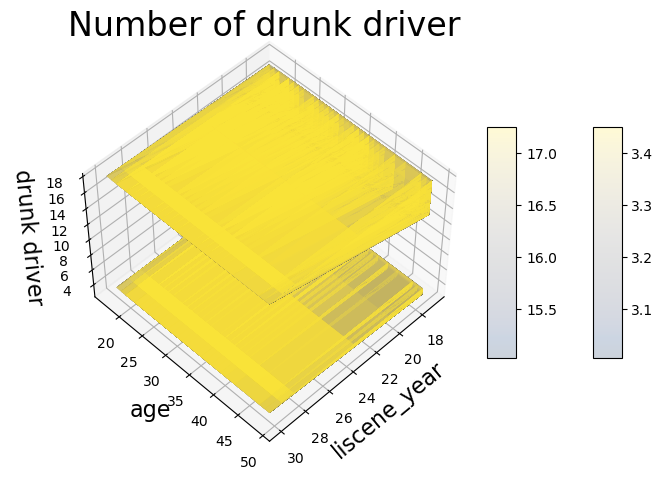

In [64]:

X1, Y1 = np.meshgrid(X_copy['liscene_year'],X_copy['age'])
Z1 =np.tile(X_copy['predicted'].values, (len(X_copy['age']), 1))
Z2=Z1*5
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(X1, Y1, Z1, cmap = plt.cm.cividis, alpha = 0.2)
surf2 = ax.plot_surface(X1, Y1, Z2, cmap = plt.cm.cividis, alpha = 0.2)
ax.set_xlabel('liscene_year',fontsize = 16)
ax.set_ylabel('age',fontsize = 16)
ax.set_zlabel('drunk driver',fontsize = 16)
plt.title('Number of drunk driver' ,fontsize = 24)
fig.colorbar(surf1, shrink=0.5, aspect=8)
fig.colorbar(surf2, shrink=0.5, aspect=8)
ax.view_init(elev=50., azim=45)
plt.show()

<div dir="rtl">
ההבדל בין 2 המישורים הוא אך ורק בציר הz, כך שמספר הנהגים השיכורים ל5 קילומטר גדול פי 5 ממספר הנהגים השיכורים לקילומטר.
 בנוסף ניתן לראות שכמו שהסקנו מהקורולציה שככל שהגיל עולה כך גם מספר שנות הרישיון עולות מהגרף הזה אפשר להסיק שככל ששניהם עולים כך עולה גם מספר הנהגים השיכורים